# Step 2: Enriching and cleaning
This jupyter notebook should only be opened after running the "1-downloading-and-cleaning.py" script. That script will download all the data necesary for this jupyter notebook and save it in the data folder. If it hasnt been run, remove the "#" bellow and run that cell, it will run the script. The next cell will import all the libraries needed to run this jupyter notebook.

In [32]:
#! python 1-downloading-and-cleaning.py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mp
from python_scripts import cleaning as cl

## Loading our data
The previous script downloaded data from transit accidents in Barcelona from 01/01/2010 to 12/31/2021, cleaned it and stored it in a csv file in the folder called "data". It also downloaded weather information for the same period in Bacerlona from the Historical weather API from OpenMeteo:

https://open-meteo.com/

We will now proceed to load this data, enrich it into a single data source (taking the accidents data base and enricihing it with weather data).
First, we need to load the data:

In [33]:
accidents = pd.read_csv("data/accidents_clean.csv")
weather_hourly = pd.read_csv("data/hourly_weather.csv")
weather_daily = pd.read_csv("data/daily_weather.csv")

/var/folders/zt/x4f866fn6v5b11fyl7jzdnk80000gn/T/ipykernel_5060/2871015148.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents = pd.read_csv("data/accidents_clean.csv")


In [34]:
accidents.sample(5)

,Unnamed: 0,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,postal_code,type_day,cyrcadian,cause_incident,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,date
82705,82706,2013S005820,4.0,Les Corts,42-4-20,la Maternitat i Sant Ramon,100708.0,Arístides Maillol,0001 0001,Laboral,Tarda,Desconegut,0.0,1.0,0.0,1.0,2.0,2013-08-09 21:00:00
22225,22226,2010S007257,9.0,Sant Andreu,93-9-59,el Bon Pastor,701321.0,Sao Paulo,0018 0034,Laboral,Tarda,Desconegut,0.0,1.0,0.0,1.0,2.0,2010-10-25 20:00:00
68881,68882,2012S001341,10.0,Sant Martí,105-10-67,la Vila Olímpica del Poblenou,62609.0,Icària,0152 0158,Laboral,Nit,Desconegut,0.0,1.0,0.0,1.0,1.0,2012-02-24 04:00:00
68589,68590,2012S007697,4.0,Les Corts,42-4-20,la Maternitat i Sant Ramon,244209.0,Joan XXIII,0003 0015,Laboral,Tarda,Desconegut,0.0,1.0,0.0,1.0,2.0,2012-11-03 14:00:00
26571,26572,2010S006756,5.0,Sarrià-Sant Gervasi,53-5-27,el Putxet i el Farró,32700.0,Balmes,0326 0328,Laboral,Tarda,Desconegut,0.0,1.0,0.0,1.0,2.0,2010-10-05 14:00:00


In [35]:
weather_daily.sample(5)

,Unnamed: 0,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,precipitation_sum,rain_sum,precipitation_hours,date
4367,daily,14.3,5.5,9.1,3.4,13.1,7.6,2021-12-16T08:09,2021-12-16T17:24,0.0,0.0,0.0,2021-12-16
634,daily,27.6,17.1,22.7,17.9,29.4,24.4,2011-09-27T06:42,2011-09-27T18:42,0.0,0.0,0.0,2011-09-27
1445,daily,13.7,5.9,9.7,3.5,12.1,7.9,2013-12-16T08:09,2013-12-16T17:24,0.0,0.0,0.0,2013-12-16
1763,daily,21.2,14.9,17.9,15.0,22.7,19.0,2014-10-30T07:19,2014-10-30T17:50,0.0,0.0,0.0,2014-10-30
3031,daily,21.0,11.4,16.7,10.5,22.1,16.7,2018-04-20T06:02,2018-04-20T19:38,0.0,0.0,0.0,2018-04-20


In [36]:
weather_hourly.sample(5)

,Unnamed: 0,temperature_2m,relativehumidity_2m,dewpoint_2m,precipitation,rain,windspeed_100m,winddirection_100m,soil_temperature_100_to_255cm,soil_moisture_100_to_255cm,date
9507,hourly,5.6,79,2.3,0.0,0.0,15.2,356,10.7,0.153,2011-02-01 03:00:00
4670,hourly,28.6,68,22.2,0.0,0.0,19.0,195,19.3,0.155,2010-07-14 14:00:00
42736,hourly,17.1,49,6.3,0.0,0.0,32.4,271,19.1,0.140,2014-11-16 16:00:00
98148,hourly,14.6,56,5.9,0.0,0.0,13.6,248,11.4,0.179,2021-03-13 12:00:00
54991,hourly,9.8,91,8.5,0.0,0.0,2.9,60,11.5,0.179,2016-04-10 07:00:00


## Merging weather information with accident information
Since we have hour information for every entry in our accidents list, lets add the weather information:

In [37]:
full_data = accidents
full_data = full_data.merge(weather_hourly, left_on="date", right_on="date", how="left")

In [38]:
full_data.sample(5)

,Unnamed: 0_x,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,postal_code,type_day,...,Unnamed: 0_y,temperature_2m,relativehumidity_2m,dewpoint_2m,precipitation,rain,windspeed_100m,winddirection_100m,soil_temperature_100_to_255cm,soil_moisture_100_to_255cm
102829,102830,2019S002207,2.0,Eixample,5,el Fort Pienc,178308.0,Lepant ...,0200 0200,Laboral,...,hourly,16.1,38,1.9,0.0,0.0,18.7,90,11.3,0.181
30816,30817,2014S005388,2.0,Eixample,24-2-7,la Dreta de l'Eixample,309406.0,Sant Pere,0001 0001,Laboral,...,hourly,20.6,88,18.6,0.0,0.0,1.4,360,19.7,0.141
24415,24416,2010S005045,8.0,Nou Barris,82-8-49,Canyelles,701267.0,Dalt (Besòs),001410000,Laboral,...,hourly,27.7,68,21.3,0.0,0.0,1.8,281,19.8,0.155
62058,62059,2012S007974,2.0,Eixample,24-2-7,la Dreta de l'Eixample,359404.0,Joan Carles I,9999 9999,Laboral,...,hourly,16.7,57,8.1,0.0,0.0,42.1,35,19.0,0.146
59107,59108,2017S005308,8.0,Nou Barris,50,les Roquetes,120807.0,Favència ...,0223 0223,Laboral,...,hourly,29.6,59,20.8,0.0,0.0,12.6,149,18.2,0.165


Excelent! Now we have weather information for every incident. Lets clean up a few columns and export our data:

In [39]:
cl.delete_columns(full_data,['Unnamed: 0_x', "Unnamed: 0_y"])
full_data.sample(5)

Deleted columns:  ['Unnamed: 0_x', 'Unnamed: 0_y']


,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,postal_code,type_day,cyrcadian,...,date,temperature_2m,relativehumidity_2m,dewpoint_2m,precipitation,rain,windspeed_100m,winddirection_100m,soil_temperature_100_to_255cm,soil_moisture_100_to_255cm
82392,2013S002956,10.0,Sant Martí,104-10-68,el Poblenou,701265.0,Litoral (Besòs),000720000,Laboral,Nit,...,2013-04-23 22:00:00,13.5,77,9.6,0.0,0.0,9.2,51,11.7,0.148
92416,2018S005886,1.0,Ciutat Vella,3,la Barceloneta,64207.0,Doctor Aiguader / Carbonell ...,10-12,Laboral,Tarda,...,2018-07-30 14:00:00,30.4,67,23.6,0.0,0.0,15.8,179,21.6,0.165
50632,2011S004949,2.0,Eixample,26-2-5,el Fort Pienc,9209.0,Alí Bei,0130 0130,Laboral,Matí,...,2011-07-19 13:00:00,25.8,46,13.4,0.1,0.1,2.8,130,19.4,0.152
69671,2012S005219,3.0,Sants-Montjuïc,32-3-12,la Marina del Prat Vermell,370305.0,Número 4 Zona Franca,0064 0064,Laboral,Tarda,...,2012-07-17 17:00:00,29.3,51,18.2,0.0,0.0,23.9,214,19.9,0.148
26998,2014S007962,2.0,Eixample,22-2-9,la Nova Esquerra de l'Eixample,18505.0,Aragó,0063 0063,Laboral,Tarda,...,2014-10-31 15:00:00,21.2,71,15.6,0.0,0.0,12.1,153,20.7,0.140


## Analyzing correlations in the merged dataset
Now that we have a cleaner data set, lets ananlyze correlations so that we know what to visualize in the next step:

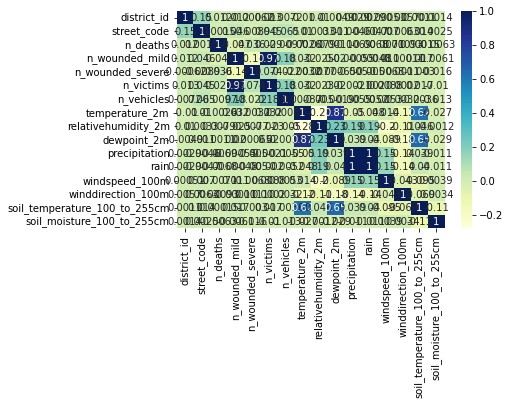

In [40]:
corr_matrix = full_data.corr()
dataplot = sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
mp.show()

Looks like we dont have much correlation between the weather data and the accident data. Lets try grouping the accident data by the day and using our daily weather data to see if we have a stronger correlation (this would add the number of victims per day and might affect the correlation).

## Grouping data to see if it affects correlation

In [41]:
accidents_grouped = accidents
cl.delete_columns(accidents_grouped, ['Unnamed: 0', 'district_id', 'district_name', 'neighborhood_id','neighborhood_name', 'street_code', 'street_name','postal_code', 'type_day', 'cyrcadian','cause_incident'])
accidents_grouped.sample(5)

Deleted columns:  ['Unnamed: 0', 'district_id', 'district_name', 'neighborhood_id', 'neighborhood_name', 'street_code', 'street_name', 'postal_code', 'type_day', 'cyrcadian', 'cause_incident']


,case_id,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,date
89233,2013S008774,0.0,1.0,0.0,1.0,2.0,2013-12-05 13:00:00
39852,2020S003458,0.0,2.0,0.0,2.0,2.0,2020-07-29 20:00:00
70544,2012S002814,0.0,1.0,0.0,1.0,2.0,2012-04-20 08:00:00
19670,2010S000873,0.0,0.0,0.0,0.0,3.0,2010-02-05 15:00:00
59159,2017S003936,0.0,1.0,0.0,1.0,1.0,2017-05-03 21:00:00


In [42]:
accidents_grouped["date"] = pd.to_datetime(accidents_grouped['date'])
accidents_grouped = accidents_grouped.groupby(pd.Grouper(key="date", axis = 0, freq="D")).sum()
accidents_grouped.sample(5)

,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles
date,,,,,
2016-07-24,0.0,16.0,1.0,17.0,37.0
2020-05-28,0.0,20.0,0.0,20.0,40.0
2013-12-29,0.0,16.0,1.0,17.0,27.0
2011-05-18,0.0,36.0,2.0,38.0,60.0
2021-02-23,0.0,25.0,0.0,25.0,41.0


Now that we have our aggregated data set, lets add the weather information.

## Merging grouped data with daily weather information

Daily weather data did not retain its DateTime type when importing the CSV. This will give an error when merging, so we will change it first.

In [43]:
weather_daily["date"] = pd.to_datetime(weather_daily["date"])

Now we will merge our newly created grouped accident data (by day) with our daily weather information:

In [44]:
grouped_data = accidents_grouped
grouped_data = grouped_data.merge(weather_daily, left_on="date", right_on="date", how="left")
grouped_data.sample(5)

,date,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,Unnamed: 0,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,precipitation_sum,rain_sum,precipitation_hours
4276,2021-09-16,0.0,19.0,2.0,21.0,39.0,daily,27.3,21.3,23.9,24.7,27.4,26.3,2021-09-16T06:31,2021-09-16T19:00,10.4,10.4,13.0
2665,2017-04-19,0.0,48.0,1.0,49.0,71.0,daily,17.3,12.3,14.4,7.8,15.6,11.2,2017-04-19T06:03,2017-04-19T19:37,0.0,0.0,0.0
2138,2015-11-09,0.0,36.0,0.0,36.0,63.0,daily,20.9,14.0,16.4,13.8,22.0,16.9,2015-11-09T07:30,2015-11-09T17:39,0.0,0.0,0.0
632,2011-09-25,0.0,21.0,0.0,21.0,38.0,daily,24.6,17.6,21.5,18.4,26.6,22.9,2011-09-25T06:40,2011-09-25T18:45,0.4,0.4,2.0
1609,2014-05-29,0.0,36.0,0.0,36.0,62.0,daily,21.4,15.6,18.1,16.3,20.5,18.2,2014-05-29T05:20,2014-05-29T20:17,2.5,2.5,7.0


## Correlations in grouped data

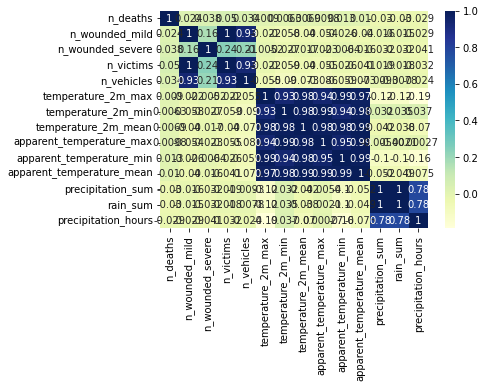

In [45]:
corr_matrix_grouped = grouped_data.corr()
dataplot_grouped = sns.heatmap(corr_matrix_grouped, cmap="YlGnBu", annot=True)
mp.show()

Looks like they are still not correlated. The issue might be the types of accidents being recorded 

Looks like we are out of luck, weather data and accident data do not seem to be very correalted. Lets export these data sets for visualilzing either way.

In [46]:
full_data.to_csv('data/results/detailed.csv')
grouped_data.to_csv('data/results/grouped.csv')